In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import time

In [3]:
metered_data = pd.read_excel('metered_data.xlsx')

In [ ]:
training_set = metered_data[metered_data['year'] < 2024]['mw'].values.reshape(-1, 1)
test_set = metered_data[metered_data['year'] == 2024]['mw'].values.reshape(-1, 1)

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.transform(test_set)

def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled, time_steps=24)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Function to create, train, and save the model with a dynamic number of layers
def create_train_save_model(epochs, num_layers, X_train, y_train, filename):
    # Create the model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))

    # Add additional LSTM layers dynamically based on num_layers
    for _ in range(1, num_layers):
        model.add(LSTM(units=50, return_sequences=True))  # return_sequences=True for layers before the last one
        model.add(Dropout(0.2))

    # Final LSTM layer
    model.add(LSTM(units=50, return_sequences=False))  # No need for return_sequences on the last layer
    model.add(Dropout(0.2))

    # Add the output layer
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=32)

    # Save the model
    model.save(filename)
    print(f"Model with {epochs} epochs and {num_layers} layers saved as {filename}.")

# Set the device to GPU
with tf.device('/GPU:0'):
    # List of epochs and corresponding filenames
    epoch_values = [25, 50, 75]
    layer_values = [1, 2, 3, 4]

    # Loop through epochs, layers, and filenames, create, train, and save the model
    for epochs in epoch_values:
        for num_layers in layer_values:
            filename = f'model_{epochs}_epochs_{num_layers}_layers.h5'
            create_train_save_model(epochs, num_layers, X_train, y_train, filename)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0101
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0016
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 9.3377e-04
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 6.2384e-04
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.2678e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.9658e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.5896e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.3851e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.3398e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.0990e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.9077e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.0620e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.8363e-04
Epoch 14/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - los

Model with 25 epochs and 1 layers saved as model_25_epochs_1_layers.h5.
Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0115
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0019
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0010
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 7.1733e-04
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.0031e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.5593e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.2130e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.2159e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.0034e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.7105e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.6083e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 4.5562e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step 

Model with 25 epochs and 2 layers saved as model_25_epochs_2_layers.h5.
Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0153
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0037
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0014
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9.3765e-04
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 7.7328e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 7.1300e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 6.1381e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.8425e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 5.5138e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.4464e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 5.1811e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.0923e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━

Model with 25 epochs and 3 layers saved as model_25_epochs_3_layers.h5.
Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0166
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0060
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0026
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0013
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 9.7281e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 7.6009e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 6.7782e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 6.7037e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 6.1473e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 5.9016e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 5.7763e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 5.6629e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━━━

Model with 25 epochs and 4 layers saved as model_25_epochs_4_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0098
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0016
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 9.5939e-04
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.5757e-04
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 5.3567e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.6896e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.4503e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.1232e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.0847e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 3.9778e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 3.9489e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.0191e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/s

Model with 50 epochs and 1 layers saved as model_50_epochs_1_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0119
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0020
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0011
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 7.5365e-04
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 6.0097e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.4452e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 4.9524e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.1627e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.0501e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.7930e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.7883e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.5048e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/ste

Model with 50 epochs and 2 layers saved as model_50_epochs_2_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0147
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0037
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0014
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 9.8813e-04
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 7.7670e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.8865e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.2105e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.7376e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 5.6183e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.6414e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.4605e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 5.2849e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━

Model with 50 epochs and 3 layers saved as model_50_epochs_3_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0151
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0057
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0020
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0012
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 9.5732e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 7.9580e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 7.0196e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 6.5888e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 6.2832e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.9901e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 5.6492e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 5.4311e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━━━━

Model with 50 epochs and 4 layers saved as model_50_epochs_4_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0117
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0018
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 9.7793e-04
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 6.5413e-04
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 5.2641e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.6749e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.6368e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.1618e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.1871e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.1831e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.9796e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.9021e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/ste

Model with 75 epochs and 1 layers saved as model_75_epochs_1_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0135
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0027
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0011
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 8.1568e-04
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 6.3024e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.6454e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.5979e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.1347e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.1406e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.5409e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.8516e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.4202e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step 

Model with 75 epochs and 2 layers saved as model_75_epochs_2_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0138
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0040
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0015
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0010
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 7.7278e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 6.6593e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.0768e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.9656e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.8678e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 5.6228e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.1488e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.0800e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━

Model with 75 epochs and 3 layers saved as model_75_epochs_3_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0171
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0054
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0019
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0012
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 8.8872e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 7.5020e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 6.8638e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 6.7759e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 6.5041e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 6.0827e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.8650e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 5.8052e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━

Model with 75 epochs and 4 layers saved as model_75_epochs_4_layers.h5.


In [ ]:
dataset_train = metered_data[metered_data['year'] < 2024][['mw']]
dataset_test = metered_data[metered_data['year'] == 2024][['mw']]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 24:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(24, len(inputs)):
    X_test.append(inputs[i - 24:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

print(len(X_test))



(8784, 24, 1)
8784


In [ ]:
from tensorflow import keras

# Define the epochs and layer configurations
epochs_list = [25, 50, 75]
layers_list = [1, 2, 3, 4]

# Dictionary to store loaded models
models = {}

# Load all models using a loop
for epochs in epochs_list:
    for layers in layers_list:
        model_name = f"model_{epochs}_epochs_{layers}_layers"
        model_path = f"/content/{model_name}.h5"
        models[model_name] = keras.models.load_model(model_path)

# Dictionary to store predictions
predictions = {}

# Make predictions for each model
for model_name, model in models.items():
    predicted_mw_scaled = model.predict(X_test)
    predicted_mw = sc.inverse_transform(predicted_mw_scaled)  # Convert back to original MW scale
    predictions[model_name] = predicted_mw  # Store in dictionary



275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [ ]:
predictions_df = pd.DataFrame({key: value.flatten() for key, value in predictions.items()})

In [15]:
metered_data['datetime_beginning_ept'] = pd.to_datetime(metered_data['datetime_beginning_ept'])

metered_data['year'] = metered_data['datetime_beginning_ept'].dt.year
metered_data['month'] = metered_data['datetime_beginning_ept'].dt.month
metered_data['day'] = metered_data['datetime_beginning_ept'].dt.day
metered_data['hour'] = metered_data['datetime_beginning_ept'].dt.hour
actual_dates = metered_data[metered_data['year'] == 2024]['datetime_beginning_ept']


In [16]:
df = pd.read_csv('dom_pjm_hist_forecast_2024.csv')
pjm_forecast = df[['forecast_hour_beginning_ept', 'forecast_load_mw']]
pjm_forecast_first_instance = pjm_forecast.drop_duplicates(subset='forecast_hour_beginning_ept', keep='first')

pjm_forecast_first_instance['forecast_hour_beginning_ept'] = pd.to_datetime(pjm_forecast_first_instance['forecast_hour_beginning_ept'])
len(pjm_forecast_first_instance)

<ipython-input-16-212c0b9e945b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pjm_forecast_first_instance['forecast_hour_beginning_ept'] = pd.to_datetime(pjm_forecast_first_instance['forecast_hour_beginning_ept'])
<ipython-input-16-212c0b9e945b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pjm_forecast_first_instance['forecast_hour_beginning_ept'] = pd.to_datetime(pjm_forecast_first_instance['forecast_hour_beginning_ept'])


8775

In [ ]:
actual_dates = pd.to_datetime(actual_dates)
print(len(actual_dates), len(predictions_df))

predictions_df["Timestamp"] = actual_dates.values
predictions_df

8784 8784


,model_25_epochs_1_layers,model_25_epochs_2_layers,model_25_epochs_3_layers,model_25_epochs_4_layers,model_50_epochs_1_layers,model_50_epochs_2_layers,model_50_epochs_3_layers,model_50_epochs_4_layers,model_75_epochs_1_layers,model_75_epochs_2_layers,model_75_epochs_3_layers,model_75_epochs_4_layers,Timestamp
0,13397.340820,13532.841797,13318.897461,13585.735352,13436.998047,13513.075195,13474.625977,13516.153320,13592.898438,13479.842773,13488.091797,13338.226562,2024-01-01 00:00:00
1,13524.568359,13629.644531,13368.868164,13715.358398,13523.715820,13600.607422,13571.611328,13536.729492,13608.466797,13524.661133,13570.854492,13340.512695,2024-01-01 01:00:00
2,13501.938477,13596.133789,13330.391602,13623.928711,13427.836914,13546.303711,13495.834961,13519.580078,13519.822266,13481.062500,13495.619141,13299.630859,2024-01-01 02:00:00
3,13359.249023,13436.101562,13150.209961,13386.614258,13215.419922,13356.172852,13325.476562,13371.186523,13390.617188,13295.258789,13321.033203,13189.625000,2024-01-01 03:00:00
4,13454.030273,13496.143555,13234.894531,13497.154297,13314.366211,13378.797852,13415.370117,13471.012695,13463.996094,13321.933594,13452.157227,13342.414062,2024-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,13916.708008,13943.635742,13889.519531,14156.225586,13914.849609,13949.256836,14038.135742,14042.377930,13999.588867,13905.666992,14153.990234,13966.124023,2024-12-31 19:00:00
8780,13632.218750,13585.863281,13418.309570,13719.790039,13558.925781,13584.635742,13716.478516,13611.175781,13748.620117,13554.750977,13725.259766,13484.828125,2024-12-31 20:00:00
8781,13215.407227,13264.962891,13117.233398,13275.333984,13152.316406,13242.151367,13271.047852,13241.102539,13184.976562,13163.845703,13289.823242,13118.123047,2024-12-31 21:00:00
8782,12763.704102,12855.474609,12654.518555,12837.864258,12708.546875,12733.433594,12801.430664,12730.375000,12805.322266,12666.043945,12749.669922,12630.425781,2024-12-31 22:00:00


In [ ]:
predictions_df = predictions_df[['Timestamp'] + [col for col in predictions_df.columns if col != 'Timestamp']]

df_actual = pd.DataFrame(dataset_test.values, columns=['Actual MW Demand'])
df_actual["Timestamp"] = actual_dates.values
df_actual = df_actual[['Timestamp', 'Actual MW Demand']]

merged_df = pd.merge(df_actual, predictions_df, on='Timestamp', how='inner')

pjm_forecast_first_instance.rename(columns={pjm_forecast_first_instance.columns[0]: 'Timestamp'}, inplace=True)
merged_df_1 = pd.merge(merged_df, pjm_forecast_first_instance, on='Timestamp', how='inner')



<ipython-input-12-63bd34a4fcf7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pjm_forecast_first_instance.rename(columns={pjm_forecast_first_instance.columns[0]: 'Timestamp'}, inplace=True)


In [ ]:
columns_order = ['Timestamp', 'Actual MW Demand', 'forecast_load_mw'] + [col for col in merged_df_1.columns if col not in ['Timestamp', 'Actual MW Demand', 'forecast_load_mw']]
merged_df_1 = merged_df_1[columns_order]

# Display the updated DataFrame
print(merged_df_1.columns)

Index(['Timestamp', 'Actual MW Demand', 'forecast_load_mw',
       'model_25_epochs_1_layers', 'model_25_epochs_2_layers',
       'model_25_epochs_3_layers', 'model_25_epochs_4_layers',
       'model_50_epochs_1_layers', 'model_50_epochs_2_layers',
       'model_50_epochs_3_layers', 'model_50_epochs_4_layers',
       'model_75_epochs_1_layers', 'model_75_epochs_2_layers',
       'model_75_epochs_3_layers', 'model_75_epochs_4_layers'],
      dtype='object')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

models = [
    'model_25_epochs_1_layers', 'model_25_epochs_2_layers', 'model_25_epochs_3_layers', 'model_25_epochs_4_layers',
    'model_50_epochs_1_layers', 'model_50_epochs_2_layers', 'model_50_epochs_3_layers', 'model_50_epochs_4_layers',
    'model_75_epochs_1_layers', 'model_75_epochs_2_layers', 'model_75_epochs_3_layers', 'model_75_epochs_4_layers',
    'forecast_load_mw'
]

# Dictionary to store MAE and RMSE for each model
model_metrics = {}

# Calculate MAE and RMSE for each model
for model in models:
    if model in merged_df_1.columns:
        predictions = merged_df_1[model]
        actual = merged_df_1['Actual MW Demand']

        mae = mean_absolute_error(actual, predictions)
        rmse = np.sqrt(mean_squared_error(actual, predictions))

        model_metrics[model] = {'MAE': mae, 'RMSE': rmse}

# Print results in sorted order by MAE
sorted_metrics = sorted(model_metrics.items(), key=lambda x: x[1]['MAE'])

for model, metrics in sorted_metrics:
    print(f"Model: {model}")
    print(f"MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}\n")


Model: model_75_epochs_1_layers
MAE: 105.30, RMSE: 142.74

Model: model_50_epochs_3_layers
MAE: 117.06, RMSE: 163.91

Model: model_75_epochs_3_layers
MAE: 119.42, RMSE: 168.30

Model: model_50_epochs_2_layers
MAE: 119.97, RMSE: 158.21

Model: model_25_epochs_4_layers
MAE: 132.41, RMSE: 185.93

Model: model_25_epochs_2_layers
MAE: 132.62, RMSE: 178.41

Model: model_50_epochs_1_layers
MAE: 134.60, RMSE: 174.54

Model: model_75_epochs_2_layers
MAE: 136.90, RMSE: 182.89

Model: model_50_epochs_4_layers
MAE: 152.58, RMSE: 196.26

Model: model_75_epochs_4_layers
MAE: 152.59, RMSE: 196.44

Model: model_25_epochs_1_layers
MAE: 155.55, RMSE: 210.57

Model: model_25_epochs_3_layers
MAE: 216.38, RMSE: 267.76

Model: forecast_load_mw
MAE: 333.79, RMSE: 458.84



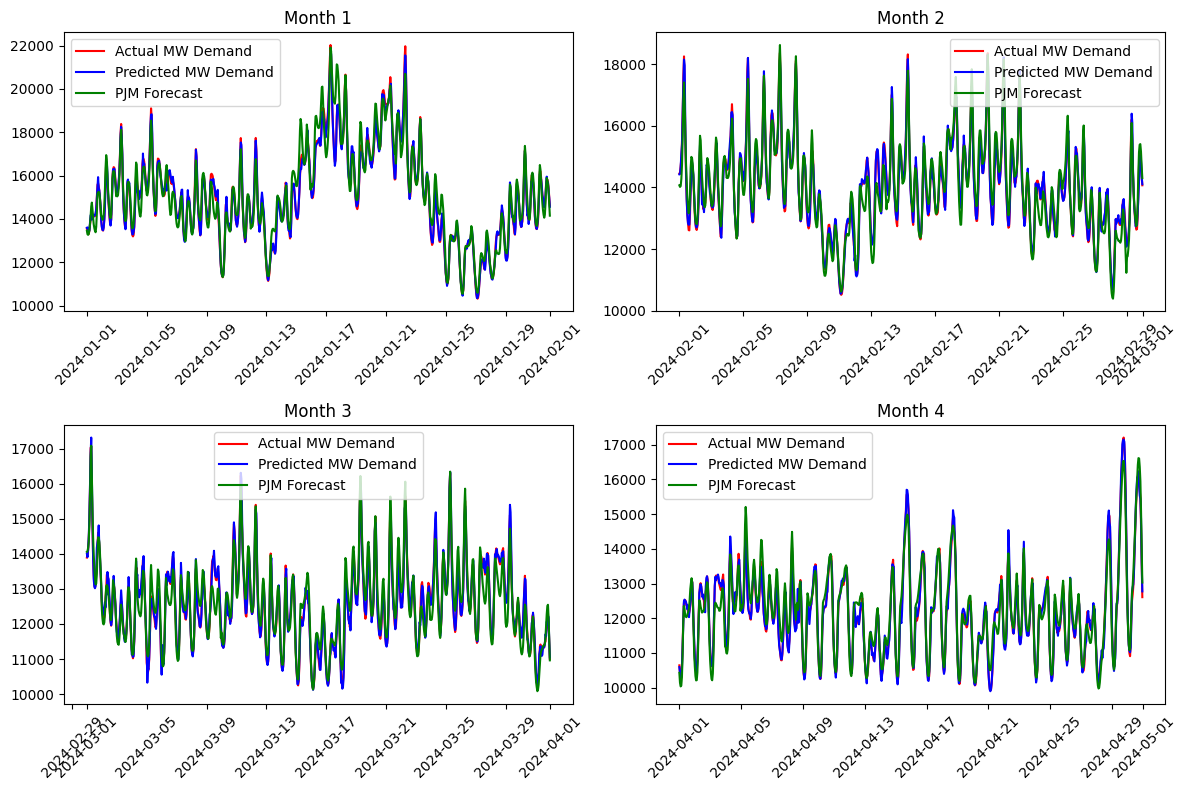

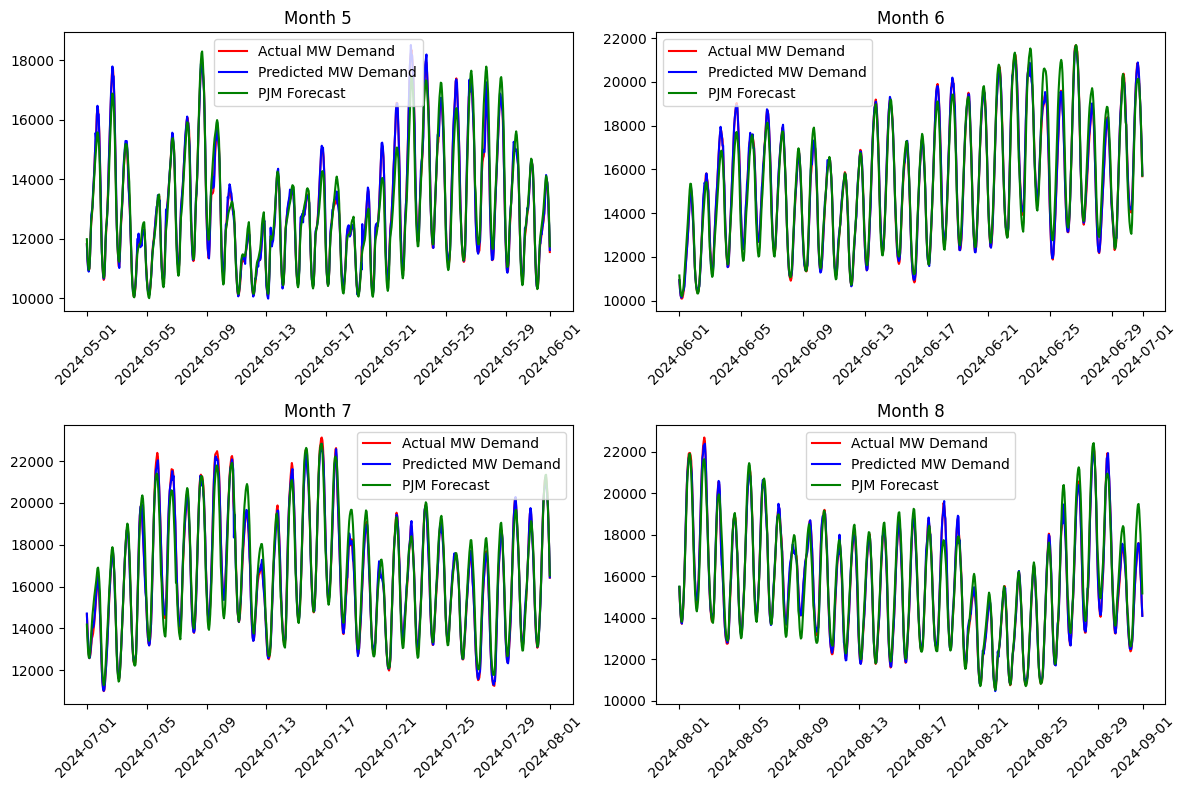

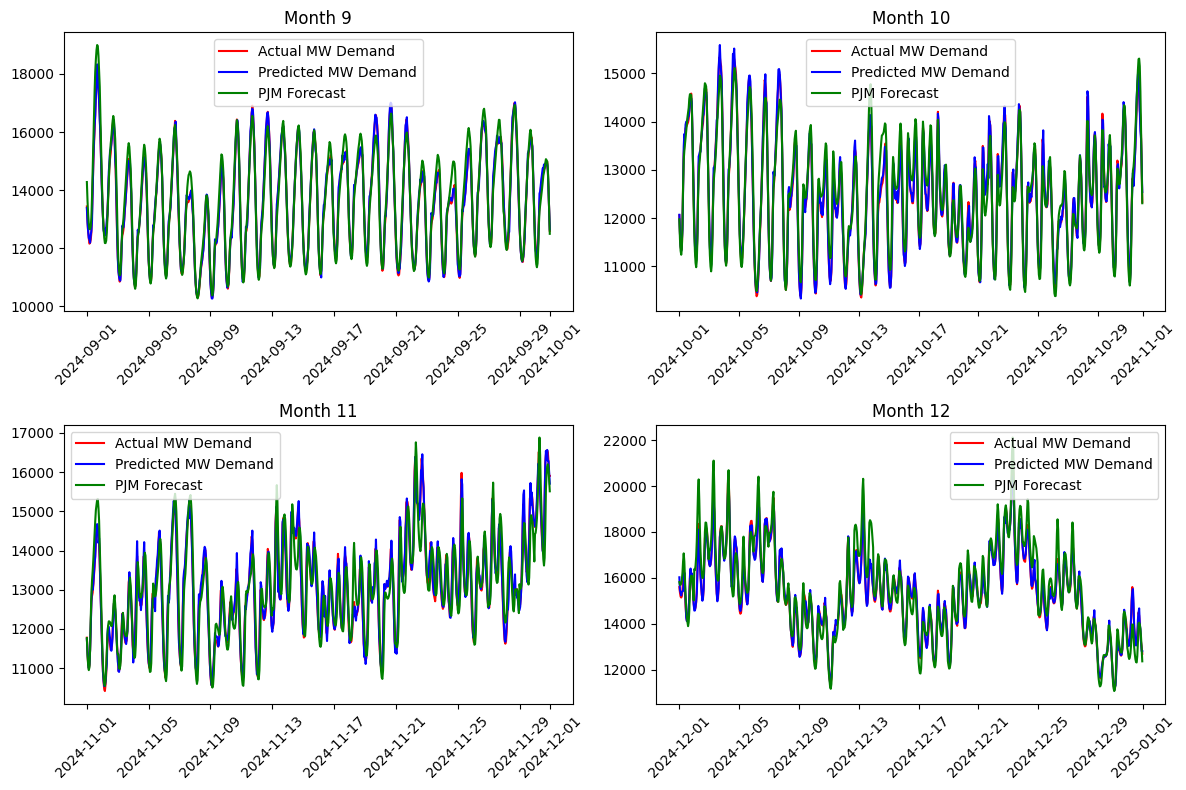

In [ ]:
merged_df_1['Timestamp'] = pd.to_datetime(merged_df_1['Timestamp'])

merged_df_1['month'] = merged_df_1['Timestamp'].dt.month

def plot_monthly_grid(start_month, end_month):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, month in enumerate(range(start_month, end_month + 1)):
        month_data = merged_df_1[merged_df_1['month'] == month]

        if month_data.empty:
            axes[i].text(0.5, 0.5, f'No Data for Month {month}', ha='center', va='center', fontsize=12)
            axes[i].set_title(f'Month {month}')
            axes[i].axis('off')
            continue

        axes[i].plot(month_data['Timestamp'], month_data['Actual MW Demand'], color='red', label='Actual MW Demand')
        axes[i].plot(month_data['Timestamp'], month_data['model_75_epochs_1_layers'], color='blue', label='Predicted MW Demand')
        axes[i].plot(month_data['Timestamp'], month_data['forecast_load_mw'], color='green', label='PJM Forecast')

        axes[i].set_title(f'Month {month}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

plot_monthly_grid(1, 4)
plot_monthly_grid(5, 8)
plot_monthly_grid(9, 12)


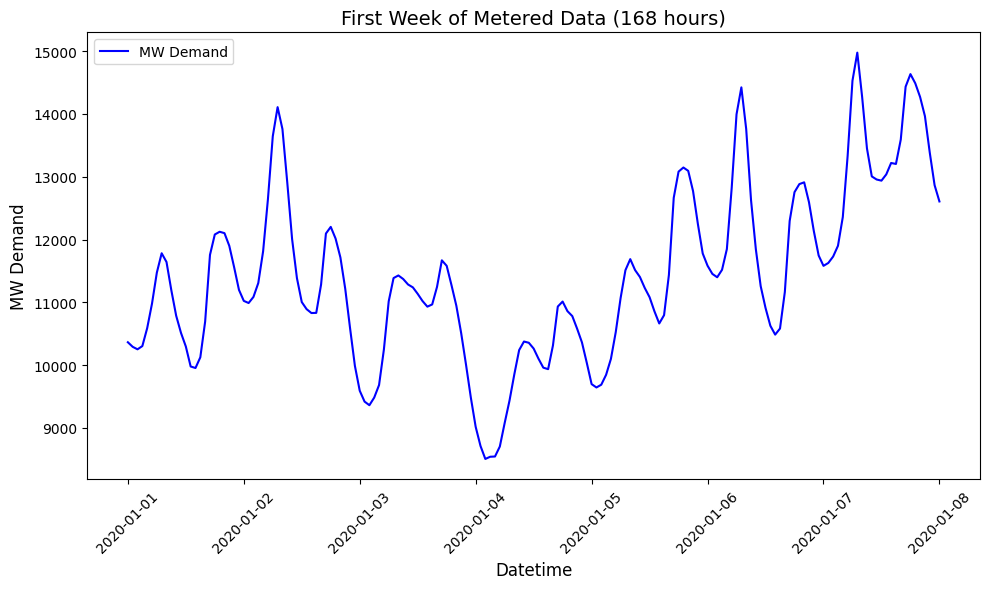

In [40]:
metered_data['datetime_beginning_ept'] = pd.to_datetime(metered_data['datetime_beginning_ept'])

first_week = metered_data[metered_data['datetime_beginning_ept'] <= metered_data['datetime_beginning_ept'].iloc[0] + pd.Timedelta(hours=168)]

plt.figure(figsize=(10, 6))
plt.plot(first_week['datetime_beginning_ept'], first_week['mw'], color='b', linestyle='-', label='MW Demand')
plt.title('First Week of Metered Data (168 hours)', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('MW Demand', fontsize=12)
plt.xticks(rotation=45)

plt.grid(False)

plt.legend()

plt.tight_layout()

plt.show()


In [4]:
metered_data['hour_sin'] = np.sin(2 * np.pi * metered_data['hour'] / 24)
metered_data['hour_cos'] = np.cos(2 * np.pi * metered_data['hour'] / 24)

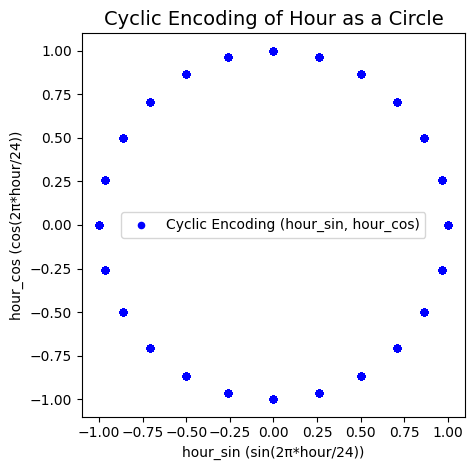

In [41]:
ax = metered_data.plot.scatter(x='hour_sin', y='hour_cos', color='b', label='Cyclic Encoding (hour_sin, hour_cos)')

ax.set_aspect('equal', adjustable='box')

plt.title('Cyclic Encoding of Hour as a Circle', fontsize=14)
plt.xlabel('hour_sin (sin(2π*hour/24))')
plt.ylabel('hour_cos (cos(2π*hour/24))')

plt.grid(False)

plt.tight_layout()
plt.show()


In [5]:
training_set = metered_data[metered_data['year'] < 2024][['mw', 'hour_sin', 'hour_cos']].values

test_set = metered_data[metered_data['year'] == 2024][['mw', 'hour_sin', 'hour_cos']].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.transform(test_set)

def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled, time_steps=24)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))

In [ ]:
# Function to create, train, and save the model with a dynamic number of layers
def create_train_save_model(epochs, num_layers, X_train, y_train, filename):
    # Create the model
    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))  # 3 features
    model.add(Dropout(0.2))

    # Add additional LSTM layers dynamically based on num_layers
    for _ in range(1, num_layers):
        model.add(LSTM(units=50, return_sequences=True))  # return_sequences=True for layers before the last one
        model.add(Dropout(0.2))

    # Final LSTM layer
    model.add(LSTM(units=50, return_sequences=False))  # No need for return_sequences on the last layer
    model.add(Dropout(0.2))

    # Add the output layer
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=32)

    # Save the model
    model.save(filename)
    print(f"Model with {epochs} epochs and {num_layers} layers saved as {filename}.")

# Set the device to GPU
with tf.device('/GPU:0'):
    # List of epochs and corresponding filenames
    epoch_values = [25, 50, 75]
    layer_values = [1, 2, 3, 4]

    # Loop through epochs, layers, and filenames, create, train, and save the model
    for epochs in epoch_values:
        for num_layers in layer_values:
            filename = f'cyclical_model_{epochs}_epochs_{num_layers}_layers.h5'
            create_train_save_model(epochs, num_layers, X_train, y_train, filename)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0117
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0017
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0011
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 7.5324e-04
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.7189e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.8450e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.5331e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.2205e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.2047e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.0090e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.8823e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.9365e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.7724e-04
Epoch 14/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - lo

Model with 25 epochs and 1 layers saved as cyclical_model_25_epochs_1_layers.h5.
Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0136
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0024
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0016
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0011
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.1397e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 6.8186e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.7212e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.2758e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.0714e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.6253e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.5520e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.1553e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step 

Model with 25 epochs and 2 layers saved as cyclical_model_25_epochs_2_layers.h5.
Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0131
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0029
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0017
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0012
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 8.4505e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 6.7998e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 6.1662e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.8914e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.9970e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.1371e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.9005e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.8546e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step 

Model with 25 epochs and 3 layers saved as cyclical_model_25_epochs_3_layers.h5.
Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0133
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0039
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0019
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0013
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 9.8343e-04
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 7.8159e-04
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 7.1090e-04
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.4124e-04
Epoch 9/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.8210e-04
Epoch 10/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.5727e-04
Epoch 11/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.5242e-04
Epoch 12/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.1419e-04
Epoch 13/25
1095/1095 ━━━━━━━━━━

Model with 25 epochs and 4 layers saved as cyclical_model_25_epochs_4_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0097
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0017
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0010
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 7.6278e-04
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.6390e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.8193e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.2671e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.0738e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.1323e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.8762e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.7995e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.7668e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/st

Model with 50 epochs and 1 layers saved as cyclical_model_50_epochs_1_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0127
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0024
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0015
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 9.9571e-04
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.6468e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.0882e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.7327e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.2139e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.9983e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.8423e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.4977e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.3709e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/s

Model with 50 epochs and 2 layers saved as cyclical_model_50_epochs_2_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0126
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0028
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0018
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0012
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 8.9712e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 7.0559e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 6.1276e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.7675e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.2734e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.1516e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.8705e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.7614e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step 

Model with 50 epochs and 3 layers saved as cyclical_model_50_epochs_3_layers.h5.
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0141
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0037
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0020
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0014
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 9.9552e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 8.2467e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.9248e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.4972e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.9651e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.2206e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.7120e-04
Epoch 12/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.2585e-04
Epoch 13/50
1095/1095 ━━━━━━━━━━

Model with 50 epochs and 4 layers saved as cyclical_model_50_epochs_4_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0106
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0017
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0011
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 7.9310e-04
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.9640e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.0306e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.6464e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.1486e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.0881e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.0138e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.9195e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.7036e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/st

Model with 75 epochs and 1 layers saved as cyclical_model_75_epochs_1_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0111
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0023
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0014
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0010
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.5231e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.1680e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.5381e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.2521e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.8694e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.8425e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.4808e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.5538e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step 

Model with 75 epochs and 2 layers saved as cyclical_model_75_epochs_2_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0125
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0030
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0017
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0011
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 8.6302e-04
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 7.0942e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 6.1404e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.4949e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.3392e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 4.9528e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5.0207e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.6385e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step 

Model with 75 epochs and 3 layers saved as cyclical_model_75_epochs_3_layers.h5.
Epoch 1/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0140
Epoch 2/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0041
Epoch 3/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0021
Epoch 4/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0014
Epoch 5/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0010
Epoch 6/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 8.2841e-04
Epoch 7/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 7.1429e-04
Epoch 8/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.6542e-04
Epoch 9/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.2375e-04
Epoch 10/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.8476e-04
Epoch 11/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.4325e-04
Epoch 12/75
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.3033e-04
Epoch 13/75
1095/1095 ━━━━━━━━━━━━━━

Model with 75 epochs and 4 layers saved as cyclical_model_75_epochs_4_layers.h5.


In [43]:
dataset_train = metered_data[metered_data['year'] < 2024][['mw', 'hour_sin', 'hour_cos']]
dataset_test = metered_data[metered_data['year'] == 2024][['mw', 'hour_sin', 'hour_cos']]

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 24:].values
inputs = inputs.reshape(-1, 3)
inputs = sc.transform(inputs)

X_test = []
for i in range(24, len(inputs)):
    X_test.append(inputs[i - 24:i, :])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))
print(X_test.shape)

print(len(X_test))


(8784, 24, 3)
8784


In [44]:
from tensorflow import keras

# Define the epochs and layer configurations
epochs_list = [25, 50, 75]
layers_list = [1, 2, 3, 4]

# Dictionary to store loaded models
models = {}

# Load all models using a loop
for epochs in epochs_list:
    for layers in layers_list:
        model_name = f"cyclical_model_{epochs}_epochs_{layers}_layers"
        model_path = f"/content/{model_name}.h5"
        models[model_name] = keras.models.load_model(model_path)

# Dictionary to store predictions
predictions = {}

for model_name, model in models.items():
    predicted_mw_scaled = model.predict(X_test)

    # Create a placeholder array with the same shape as the original scaled data
    predicted_mw_placeholder = np.zeros((predicted_mw_scaled.shape[0], 3))

    # Insert the predicted MW values into the first column
    predicted_mw_placeholder[:, 0] = predicted_mw_scaled[:, 0]

    # Apply inverse transform
    predicted_mw = sc.inverse_transform(predicted_mw_placeholder)[:, 0]  # Extract only MW

    # Store in dictionary
    predictions[model_name] = predicted_mw


275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [45]:
predictions_df = pd.DataFrame({key: value.flatten() for key, value in predictions.items()})
predictions_df

,cyclical_model_25_epochs_1_layers,cyclical_model_25_epochs_2_layers,cyclical_model_25_epochs_3_layers,cyclical_model_25_epochs_4_layers,cyclical_model_50_epochs_1_layers,cyclical_model_50_epochs_2_layers,cyclical_model_50_epochs_3_layers,cyclical_model_50_epochs_4_layers,cyclical_model_75_epochs_1_layers,cyclical_model_75_epochs_2_layers,cyclical_model_75_epochs_3_layers,cyclical_model_75_epochs_4_layers
0,13419.726983,13430.759581,13497.161782,13728.360591,13521.384967,13526.957315,13549.740376,13481.841782,13516.726984,13857.566003,13672.534685,13474.189694
1,13473.936046,13531.586285,13602.130821,13824.775487,13587.187556,13606.821335,13599.669950,13544.964140,13537.515147,13793.709075,13702.770696,13477.595702
2,13467.499888,13571.586652,13620.425583,13862.343117,13551.540091,13572.700155,13558.517835,13484.531244,13463.478003,13621.426988,13586.099550,13403.766048
3,13427.488091,13581.594108,13529.328948,13751.785905,13359.278261,13408.314572,13401.029109,13339.243569,13328.476928,13464.900543,13359.095388,13237.237863
4,13660.893683,13824.544258,13698.282837,13858.476411,13530.061319,13518.929371,13546.841225,13374.174489,13452.694217,13532.556478,13434.287797,13357.433707
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,14200.990299,14113.021406,14113.627612,14411.167518,14164.809601,14173.545738,14151.230410,14183.931248,14099.962699,14251.259683,14244.572953,14079.077384
8780,13703.886396,13595.033067,13589.072993,13906.244040,13658.377422,13714.687766,13699.607786,13721.092273,13626.648097,13799.470011,13775.646421,13654.504562
8781,13197.840624,13143.707611,13134.983344,13415.332319,13150.784704,13140.529755,13191.997044,13139.450102,13019.730342,13168.879889,13213.409877,13169.815354
8782,12691.458999,12748.383021,12691.720120,12907.360227,12668.928707,12672.669249,12757.942086,12633.940640,12562.804404,12746.647487,12641.414690,12704.388464


In [46]:
actual_dates = pd.to_datetime(actual_dates)
print(len(actual_dates), len(predictions_df))

predictions_df["Timestamp"] = actual_dates.values
predictions_df

8784 8784


,cyclical_model_25_epochs_1_layers,cyclical_model_25_epochs_2_layers,cyclical_model_25_epochs_3_layers,cyclical_model_25_epochs_4_layers,cyclical_model_50_epochs_1_layers,cyclical_model_50_epochs_2_layers,cyclical_model_50_epochs_3_layers,cyclical_model_50_epochs_4_layers,cyclical_model_75_epochs_1_layers,cyclical_model_75_epochs_2_layers,cyclical_model_75_epochs_3_layers,cyclical_model_75_epochs_4_layers,Timestamp
0,13419.726983,13430.759581,13497.161782,13728.360591,13521.384967,13526.957315,13549.740376,13481.841782,13516.726984,13857.566003,13672.534685,13474.189694,2024-01-01 00:00:00
1,13473.936046,13531.586285,13602.130821,13824.775487,13587.187556,13606.821335,13599.669950,13544.964140,13537.515147,13793.709075,13702.770696,13477.595702,2024-01-01 01:00:00
2,13467.499888,13571.586652,13620.425583,13862.343117,13551.540091,13572.700155,13558.517835,13484.531244,13463.478003,13621.426988,13586.099550,13403.766048,2024-01-01 02:00:00
3,13427.488091,13581.594108,13529.328948,13751.785905,13359.278261,13408.314572,13401.029109,13339.243569,13328.476928,13464.900543,13359.095388,13237.237863,2024-01-01 03:00:00
4,13660.893683,13824.544258,13698.282837,13858.476411,13530.061319,13518.929371,13546.841225,13374.174489,13452.694217,13532.556478,13434.287797,13357.433707,2024-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,14200.990299,14113.021406,14113.627612,14411.167518,14164.809601,14173.545738,14151.230410,14183.931248,14099.962699,14251.259683,14244.572953,14079.077384,2024-12-31 19:00:00
8780,13703.886396,13595.033067,13589.072993,13906.244040,13658.377422,13714.687766,13699.607786,13721.092273,13626.648097,13799.470011,13775.646421,13654.504562,2024-12-31 20:00:00
8781,13197.840624,13143.707611,13134.983344,13415.332319,13150.784704,13140.529755,13191.997044,13139.450102,13019.730342,13168.879889,13213.409877,13169.815354,2024-12-31 21:00:00
8782,12691.458999,12748.383021,12691.720120,12907.360227,12668.928707,12672.669249,12757.942086,12633.940640,12562.804404,12746.647487,12641.414690,12704.388464,2024-12-31 22:00:00


In [47]:
predictions_df = predictions_df[['Timestamp'] + [col for col in predictions_df.columns if col != 'Timestamp']]

df_actual = pd.DataFrame(dataset_test['mw'].values, columns=['Actual MW Demand'])
df_actual["Timestamp"] = actual_dates.values
df_actual = df_actual[['Timestamp', 'Actual MW Demand']]


merged_df = pd.merge(df_actual, predictions_df, on='Timestamp', how='inner')

pjm_forecast_first_instance.rename(columns={pjm_forecast_first_instance.columns[0]: 'Timestamp'}, inplace=True)
merged_df_1 = pd.merge(merged_df, pjm_forecast_first_instance, on='Timestamp', how='inner')
merged_df_1


<ipython-input-47-8ae3d405afdb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pjm_forecast_first_instance.rename(columns={pjm_forecast_first_instance.columns[0]: 'Timestamp'}, inplace=True)


,Timestamp,Actual MW Demand,cyclical_model_25_epochs_1_layers,cyclical_model_25_epochs_2_layers,cyclical_model_25_epochs_3_layers,cyclical_model_25_epochs_4_layers,cyclical_model_50_epochs_1_layers,cyclical_model_50_epochs_2_layers,cyclical_model_50_epochs_3_layers,cyclical_model_50_epochs_4_layers,cyclical_model_75_epochs_1_layers,cyclical_model_75_epochs_2_layers,cyclical_model_75_epochs_3_layers,cyclical_model_75_epochs_4_layers,forecast_load_mw
0,2024-01-01 00:00:00,13553.438,13419.726983,13430.759581,13497.161782,13728.360591,13521.384967,13526.957315,13549.740376,13481.841782,13516.726984,13857.566003,13672.534685,13474.189694,13458
1,2024-01-01 01:00:00,13455.698,13473.936046,13531.586285,13602.130821,13824.775487,13587.187556,13606.821335,13599.669950,13544.964140,13537.515147,13793.709075,13702.770696,13477.595702,13291
2,2024-01-01 02:00:00,13325.136,13467.499888,13571.586652,13620.425583,13862.343117,13551.540091,13572.700155,13558.517835,13484.531244,13463.478003,13621.426988,13586.099550,13403.766048,13263
3,2024-01-01 03:00:00,13302.830,13427.488091,13581.594108,13529.328948,13751.785905,13359.278261,13408.314572,13401.029109,13339.243569,13328.476928,13464.900543,13359.095388,13237.237863,13306
4,2024-01-01 04:00:00,13453.881,13660.893683,13824.544258,13698.282837,13858.476411,13530.061319,13518.929371,13546.841225,13374.174489,13452.694217,13532.556478,13434.287797,13357.433707,13480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,2024-12-31 19:00:00,13976.793,14200.990299,14113.021406,14113.627612,14411.167518,14164.809601,14173.545738,14151.230410,14183.931248,14099.962699,14251.259683,14244.572953,14079.077384,13975
8774,2024-12-31 20:00:00,13600.023,13703.886396,13595.033067,13589.072993,13906.244040,13658.377422,13714.687766,13699.607786,13721.092273,13626.648097,13799.470011,13775.646421,13654.504562,13778
8775,2024-12-31 21:00:00,13212.130,13197.840624,13143.707611,13134.983344,13415.332319,13150.784704,13140.529755,13191.997044,13139.450102,13019.730342,13168.879889,13213.409877,13169.815354,13423
8776,2024-12-31 22:00:00,12992.247,12691.458999,12748.383021,12691.720120,12907.360227,12668.928707,12672.669249,12757.942086,12633.940640,12562.804404,12746.647487,12641.414690,12704.388464,12904


In [48]:
columns_order = ['Timestamp', 'Actual MW Demand', 'forecast_load_mw'] + [col for col in merged_df_1.columns if col not in ['Timestamp', 'Actual MW Demand', 'forecast_load_mw']]
merged_df_1 = merged_df_1[columns_order]

# Display the updated DataFrame
print(merged_df_1.columns)

Index(['Timestamp', 'Actual MW Demand', 'forecast_load_mw',
       'cyclical_model_25_epochs_1_layers',
       'cyclical_model_25_epochs_2_layers',
       'cyclical_model_25_epochs_3_layers',
       'cyclical_model_25_epochs_4_layers',
       'cyclical_model_50_epochs_1_layers',
       'cyclical_model_50_epochs_2_layers',
       'cyclical_model_50_epochs_3_layers',
       'cyclical_model_50_epochs_4_layers',
       'cyclical_model_75_epochs_1_layers',
       'cyclical_model_75_epochs_2_layers',
       'cyclical_model_75_epochs_3_layers',
       'cyclical_model_75_epochs_4_layers'],
      dtype='object')


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

models = [
    'cyclical_model_25_epochs_1_layers', 'cyclical_model_25_epochs_2_layers', 'cyclical_model_25_epochs_3_layers', 'cyclical_model_25_epochs_4_layers',
    'cyclical_model_50_epochs_1_layers', 'cyclical_model_50_epochs_2_layers', 'cyclical_model_50_epochs_3_layers', 'cyclical_model_50_epochs_4_layers',
    'cyclical_model_75_epochs_1_layers', 'cyclical_model_75_epochs_2_layers', 'cyclical_model_75_epochs_3_layers', 'cyclical_model_75_epochs_4_layers',
    'forecast_load_mw'
]


model_metrics = {}

for model in models:
    if model in merged_df_1.columns:
        predictions = merged_df_1[model]
        actual = merged_df_1['Actual MW Demand']

        mae = mean_absolute_error(actual, predictions)
        rmse = np.sqrt(mean_squared_error(actual, predictions))

        model_metrics[model] = {'MAE': mae, 'RMSE': rmse}

sorted_metrics = sorted(model_metrics.items(), key=lambda x: x[1]['MAE'])

for model, metrics in sorted_metrics:
    print(f"Model: {model}")
    print(f"MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}\n")


Model: cyclical_model_50_epochs_1_layers
MAE: 108.55, RMSE: 146.06

Model: cyclical_model_75_epochs_3_layers
MAE: 111.22, RMSE: 152.25

Model: cyclical_model_75_epochs_4_layers
MAE: 115.23, RMSE: 163.54

Model: cyclical_model_50_epochs_2_layers
MAE: 121.70, RMSE: 170.20

Model: cyclical_model_50_epochs_4_layers
MAE: 124.52, RMSE: 171.34

Model: cyclical_model_25_epochs_2_layers
MAE: 129.37, RMSE: 174.81

Model: cyclical_model_75_epochs_2_layers
MAE: 133.07, RMSE: 171.09

Model: cyclical_model_25_epochs_1_layers
MAE: 134.78, RMSE: 174.53

Model: cyclical_model_25_epochs_3_layers
MAE: 136.47, RMSE: 190.59

Model: cyclical_model_75_epochs_1_layers
MAE: 142.34, RMSE: 196.54

Model: cyclical_model_50_epochs_3_layers
MAE: 146.47, RMSE: 197.57

Model: cyclical_model_25_epochs_4_layers
MAE: 211.74, RMSE: 276.95

Model: forecast_load_mw
MAE: 333.79, RMSE: 458.84

